# item based Collaborative Filtering

In [1]:
#contoh data
data = [
    {"user_id": 1, "item_id": 1, "rating": 4},
    {"user_id": 1, "item_id": 2, "rating": 5},
    {"user_id": 1, "item_id": 3, "rating": 3},
    {"user_id": 2, "item_id": 1, "rating": 4},
    {"user_id": 2, "item_id": 2, "rating": 3},
    {"user_id": 2, "item_id": 4, "rating": 5},
    {"user_id": 3, "item_id": 1, "rating": 5},
    {"user_id": 3, "item_id": 3, "rating": 2},
    {"user_id": 3, "item_id": 4, "rating": 3},
    {"user_id": 4, "item_id": 2, "rating": 5},
    {"user_id": 4, "item_id": 3, "rating": 4},
    {"user_id": 4, "item_id": 4, "rating": 4}
]

## Langkah 1: mengambil data
Pertama, kita akan mengambil data darai variabel data dan mengonversinya menjadi pandas DataFrame.

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(data)
df

,user_id,item_id,rating
0,1,1,4
1,1,2,5
2,1,3,3
3,2,1,4
4,2,2,3
5,2,4,5
6,3,1,5
7,3,3,2
8,3,4,3
9,4,2,5


## Langkah 2: Membuat Matriks Utility
Kita mengubah data kita menjadi matriks utility yang berisi rating pengguna pada setiap item

In [41]:
# Membuat matriks pivot untuk rating
utility_matrix = df.pivot_table(values='rating', index='user_id', columns='item_id', fill_value=0)
utility_matrix

item_id,1,2,3,4
user_id,,,,
1,4.0,5.0,0.0,0.0
2,4.0,3.0,0.0,5.0
3,5.0,0.0,2.0,3.0
4,0.0,5.0,4.0,4.0


## Langkah 3: Menghitung Similarity Antar Item
Menggunakan cosine similarity untuk menghitung kesamaan antar item.
**dengan rumus :**
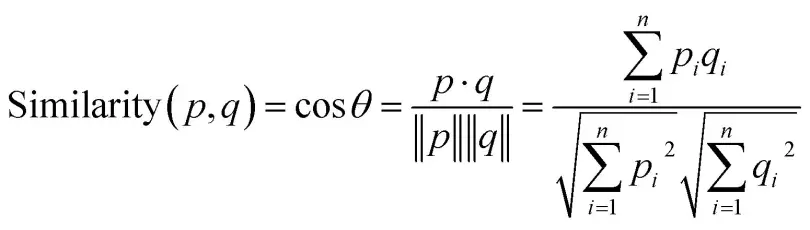


Dalam Collaborative Filtering, pengguna dapat menggunakan kemiripan kosinus untuk mengukur seberapa mirip preferensi mereka dengan preferensi item lain. Ada kemungkinan Anda menyukai film yang sama dalam pilihan.

Pengguna dapat direpresentasikan sebagai vektor dalam ruang n-dimensi, di mana n adalah jumlah item yang kita miliki. Kemiripan kosinus dihitung dengan mengukur sudut antara vektor-vektor ini.

Jika:-

- sudutnya kecil, yaitu < 90 derajat, yaitu kemiripan kosinus 1 = film atau preferensi pengguna sangat mirip
- sudutnya besar, yaitu > 90 derajat, yaitu kemiripan kosinus -1 = film atau preferensi pengguna sangat berbeda
- Jika sudutnya 90 derajat, yaitu kemiripan kosinus 0 berarti kedua vektor tersebut ortogonal (tegak lurus) satu sama lain. Ini berarti - kedua vektor tersebut tidak memiliki kemiripan sama sekali.
  
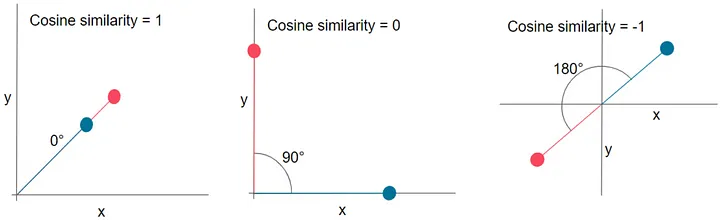
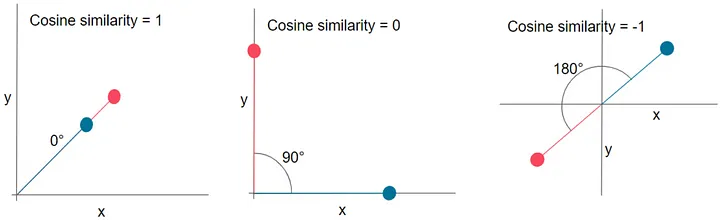

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antar item
item_similarity = cosine_similarity(utility_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)
item_similarity_df

item_id,1,2,3,4
item_id,,,,
1,1.000000,0.551806,0.541111,0.655610
2,0.551806,1.000000,0.846142,0.644402
3,0.541111,0.846142,1.000000,0.577748
4,0.655610,0.644402,0.577748,1.000000


## Langkah 4: Membuat Fungsi Rekomendasi
Membuat fungsi untuk memberikan rekomendasi item berdasarkan item yang sudah diberi rating oleh pengguna.

In [7]:
def get_item_recommendations(user_id, utility_matrix, item_similarity_df, num_recommendations=2):
    user_ratings = utility_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0].index.tolist()
    
    scores = {}
    for item in rated_items:
        similar_items = item_similarity_df[item].sort_values(ascending=False).index.tolist()
        for similar_item in similar_items:
            if similar_item not in rated_items:
                if similar_item not in scores:
                    scores[similar_item] = item_similarity_df[item][similar_item] * user_ratings[item]
                else:
                    scores[similar_item] += item_similarity_df[item][similar_item] * user_ratings[item]

    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = sorted_scores[:num_recommendations]
    return recommendations

# Contoh mendapatkan rekomendasi untuk user_id=1
recommendations = get_item_recommendations(1, utility_matrix, item_similarity_df)
# print(recommendations)
for item, score in recommendations:
    print(f"Item ID: {item}, Score: {score}")


Item ID: 4, Score: 7.577696348821213


## Penjelasan Detail
- Membaca Data :  untuk membaca data  dan mengonversinya menjadi pandas DataFrame.
- Membuat Matriks Utility: Kami menggunakan pivot_table untuk mengubah data menjadi matriks utility yang berisi rating pengguna pada setiap item. Setiap baris mewakili pengguna, dan setiap kolom mewakili item.
- Menghitung Similarity Antar Item: Kami menggunakan cosine_similarity dari sklearn untuk menghitung kesamaan antar item berdasarkan rating pengguna. Hasilnya adalah matriks similarity dimana nilai-nilai menunjukkan seberapa mirip dua item.
- Fungsi Rekomendasi: Fungsi ini bekerja dengan mengambil item yang sudah diberi rating oleh pengguna, kemudian melihat item-item yang mirip dengan item tersebut berdasarkan matriks similarity. Skor dihitung dengan mengalikan nilai kesamaan item dengan rating yang diberikan pengguna. Item dengan skor tertinggi diberikan sebagai rekomendasi.
- 
Dengan pendekatan ini, kita dapat memberikan rekomendasi item yang mirip dengan item yang sudah disukai oleh pengguna berdasarkan pola rating pengguna lainnya.


